##### import libraries and set parameters

In [68]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [70]:
%matplotlib inline 

In [71]:
pd.options.display.max_columns = 130
pd.options.display.max_info_columns = 130

##### read in data files

In [97]:
file_county_stats = "https://raw.githubusercontent.com/tonmcg/us-presidential-election-results/master/public/data/chr.csv"
file_vote_count = "US_County_Level_Presidential_Results_08-16.csv"

In [98]:
df_county_stats = pd.read_csv(file_county_stats)
df_vote_count = pd.read_csv(file_vote_count)

In [154]:
df_vote_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 2 to 9335
Data columns (total 10 columns):
fips_code    3112 non-null int64
county       3112 non-null object
Year         3112 non-null int64
total        3112 non-null int64
dem          3112 non-null int64
gop          3112 non-null int64
oth          3112 non-null int64
dem_per      3112 non-null float64
gop_per      3112 non-null float64
oth_per      3112 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 267.4+ KB


##### only focus on 2016 results

In [155]:
df_vote_count = df_vote_count[df_vote_count['Year']==2016]

In [156]:
df_vote_count.loc[:,'dem_per'] = df_vote_count.loc[:,'dem']/df_vote_count.loc[:,'total']
df_vote_count.loc[:,'gop_per'] = df_vote_count.loc[:,'gop']/df_vote_count.loc[:,'total']
df_vote_count.loc[:,'oth_per'] = df_vote_count.loc[:,'oth']/df_vote_count.loc[:,'total']

In [157]:
df_vote_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 2 to 9335
Data columns (total 10 columns):
fips_code    3112 non-null int64
county       3112 non-null object
Year         3112 non-null int64
total        3112 non-null int64
dem          3112 non-null int64
gop          3112 non-null int64
oth          3112 non-null int64
dem_per      3112 non-null float64
gop_per      3112 non-null float64
oth_per      3112 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 267.4+ KB


##### merge voting results and county level stats

In [204]:
df_data = df_vote_count.loc[:,['fips_code','dem_per','gop_per','oth_per','total']].merge(df_county_stats, how='inner', left_on='fips_code', right_on='FIPS')

In [205]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3110
Data columns (total 124 columns):
fips_code                              3111 non-null int64
dem_per                                3111 non-null float64
gop_per                                3111 non-null float64
oth_per                                3111 non-null float64
total                                  3111 non-null int64
id                                     3111 non-null int64
FIPS                                   3111 non-null int64
NAME                                   3111 non-null object
Election Win Rate                      3111 non-null float64
election_result                        3111 non-null object
Avg Daily Sunlight (KJ/m²)             3106 non-null float64
% Uninsured                            3111 non-null float64
% Unemployed                           3111 non-null float64
Providers                              3108 non-null float64
Black/White Segregation index          2030 non-

In [206]:
df_data.head()

,fips_code,dem_per,gop_per,oth_per,total,id,FIPS,NAME,Election Win Rate,election_result,Avg Daily Sunlight (KJ/m²),% Uninsured,% Unemployed,Providers,Black/White Segregation index,Drug Overdose Mortality Rate,Household Income,% Disconnected Youth,Teen Birth Rate,Violent Crime Rate,Population,Physically Unhealthy Days,PCP Rate,MHP Rate,Mentally Unhealthy Days,Income Ratio,Dentist Rate,Chlamydia Rate,Average Daily PM2.5,Association Rate,% Some College,% Smokers,% Single-Parent Households,% Severe Housing Problems,% Obese,% LBW,% Fair/Poor,% Excessive Drinking,% Drive Alone,% Physically Inactive,% Receiving HbA1c,% Mammography,% Long Commute - Drives Alone,% With Access,Food Environment Index,Graduation Rate,% Alcohol-Impaired,% Alcohol-Impaired CIH,% Alcohol-Impaired CIL,% Alcohol-Impaired Quartile,% Children in Poverty,% Children in Poverty - Black,% Children in Poverty - Hispanic,% Children in Poverty - White,% Children in Poverty CIH,% Children in Poverty CIL,% Children in Poverty Quartile,% Drive Alone - Black,% Drive Alone - Hispanic,% Drive Alone - White,% Drive Alone CIH,% Drive Alone CIL,% Drive Alone Quartile,% Excessive Drinking Quartile,% Excessive Drinking CIH,% Excessive Drinking CIL,% Long Commute CIH,% Long Commute CIL,% Long Commute Quartile,% Mammography CIH,% Mammography CIL,% Mammography Quartile,% Obese CIH,% Obese CIL,% Obese Quartile,% Severe Housing Problems CIH,% Severe Housing Problems CIL,% Severe Housing Problems Quartile,% Single-Parent Households CIH,% Single-Parent Households Quartile,% Smokers CIH,% Smokers CIL,% Smokers Quartile,% Some College CIH,% Some College CIL,% Some College Quartile,% With Access Quartile,Association Rate Quartile,Average Daily PM2.5 Quartile,Chlamydia Rate Quartile,Fair/Poor CIH,Fair/Poor CIL,Fair/Poor Quartile,Injury Death Rate,Injury Death Rate CIH,Injury Death Rate CIL,Injury Death Rate Quartile,Income Quartile,Graduation Rate Quartile,FEI Quartile,Mentally Unhealthy Days CIH,Mentally Unhealthy Days CIL,Mentally Unhealthy Days Quartile,MHP Quartile,PCP Quartile,Physically Inactive CIH,Physically Inactive CIL,Physically Inactive Quartile,Physically Unhealthy Days CIH,Physically Unhealthy Days CIL,Physically Unhealthy Days Quartile,Receiving HbA1c CIL,Receiving HbA1c HIL,Receiving HbA1c Quartile,Preventable Hosp. Rate CIH,Preventable Hosp. Rate CIL,Preventable Hosp. Rate Quartile,Teen Birth Rate CIH,Teen Birth Rate CIL,Teen Birth Rate Quartile,Violent Crime Quartile,YPLLR CIH,YPLLR CIL,YPLLR Quartile
0,1001,0.239569,0.734358,0.026074,24661,1001,1001,"Autauga County, AL",0.494789,Trump,17103.72,9.4,5.271161,1.0,34.0,10.0,56580.0,12.0,32.0,266.0,14440,4.2,42.0,13.0,4.2,4.3,31.0,398.0,10.8,13.7,59.7,17,25.0,15,34,9.0,18,15,87,29,84.0,62.7,43,71.0,6.9,90.0,33.0,40.0,25.0,3.0,19.0,43.0,NaN,11.0,23.0,14.0,1.0,NaN,NaN,83.0,89.0,86.0,4.0,4.0,16,14,47,38,3.0,70.0,55.4,2.0,39,29,2.0,17.0,13.0,2.0,31.0,1.0,18,17,1.0,65.4,53.9,1.0,1.0,2.0,3.0,2.0,18,17,1.0,76.0,87.0,66.0,2.0,1.0,3.0,2.0,4.3,4.0,1.0,3.0,2.0,33,24,2.0,4.4,4.0,1.0,77.0,91.0,3.0,65.0,52.0,2.0,35.0,30.0,1.0,2.0,10065.0,8251.0,1.0
1,1003,0.195653,0.773515,0.030832,94090,1003,1003,"Baldwin County, AL",0.577862,Trump,17660.59,11.5,5.415263,1.0,43.0,17.0,52387.0,16.0,38.0,217.0,47367,3.7,74.0,83.0,4.0,4.5,48.0,341.0,9.6,11.5,62.9,18,27.0,15,27,9.0,16,15,85,22,83.0,66.0,38,72.0,7.5,85.0,34.0,38.0,30.0,3.0,20.0,50.0,12.0,14.0,24.0,15.0,1.0,85.0,61.0,85.0,86.0,83.0,2.0,4.0,16,15,40,35,3.0,69.4,62.6,1.0,31,25,1.0,16.0,13.0,2.0,30.0,1.0,18,17,1.0,66.5,59.3,1.0,1.0,2.0,1.0,1.0,17,16,1.0,71.0,77.0,66.0,2.0,1.0,4.0,1.0,4.1,3.8,1.0,1.0,1.0,25,20,1.0,3.9,3.6,1.0,80.0,87.0,3.0,50.0,45.0,1.0,40.0,36.0,1.0,1.0,7840.0,6947.0,1.0
2,1005,0.466603,0.522714,0.010683,10390,1005,1005,"Barbour County, AL",0.056112,Trump,17315.13,13.3,8.648518,1.0,25.0,NaN,31433.0,30.0,59.0,329.0,7230,4.8,41.0,8.0,4.8,5.6,38.0,613.0,10.1,8.2,39.3,23,56.0,16,44,12.0,25,12,84,32,89.0,63.0,36,45.0,4.9,86.0,38.0,48.0,28.0,4.0,45.0,69.0,52.0,12.0,54.0,36.0,4.0,82.0,NaN

In [207]:
columns_to_drop = [col for col in df_data.columns if 'CIH' in col or 'CIL' in col or 'Quartile' in col]

In [208]:
df_data = df_data.drop(columns_to_drop, axis=1)

In [209]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3110
Data columns (total 56 columns):
fips_code                           3111 non-null int64
dem_per                             3111 non-null float64
gop_per                             3111 non-null float64
oth_per                             3111 non-null float64
total                               3111 non-null int64
id                                  3111 non-null int64
FIPS                                3111 non-null int64
NAME                                3111 non-null object
Election Win Rate                   3111 non-null float64
election_result                     3111 non-null object
Avg Daily Sunlight (KJ/m²)          3106 non-null float64
% Uninsured                         3111 non-null float64
% Unemployed                        3111 non-null float64
Providers                           3108 non-null float64
Black/White Segregation index       2030 non-null float64
Drug Overdose Mortality Rate     

In [210]:
candidate_mapping = {'Clinton': 0, 'Trump':1}
df_data['election_result'] = df_data['election_result'].map(candidate_mapping)

In [211]:
df_data = df_data.dropna(axis=1, how='any')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3110
Data columns (total 29 columns):
fips_code                        3111 non-null int64
dem_per                          3111 non-null float64
gop_per                          3111 non-null float64
oth_per                          3111 non-null float64
total                            3111 non-null int64
id                               3111 non-null int64
FIPS                             3111 non-null int64
NAME                             3111 non-null object
Election Win Rate                3111 non-null float64
election_result                  3111 non-null int64
% Uninsured                      3111 non-null float64
% Unemployed                     3111 non-null float64
Household Income                 3111 non-null float64
Population                       3111 non-null int64
Physically Unhealthy Days        3111 non-null float64
Mentally Unhealthy Days          3111 non-null float64
Association Rate          

In [212]:
df_data = df_data.select_dtypes(include=[np.number])

In [213]:
y_data = df_data.loc[:,:'election_result']
x_data = df_data.loc[:,'% Some College':]

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data['gop_per'])

In [215]:
scaler = pre.StandardScaler().fit(x_train)

In [216]:
scaled_train = scaler.transform(x_train)

#### Random Forest

In [217]:
RF = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1)

In [218]:
RF = RF.fit(x_train, y_train)

In [219]:
feature_importance = zip(x_train.columns, RF.feature_importances_)

In [220]:
feature_importance

[('% Some College', 0.13053424477146489),
 ('% Smokers', 0.024501881291615568),
 ('% Single-Parent Households', 0.14694915015347509),
 ('% Severe Housing Problems', 0.30399931729796181),
 ('% Obese', 0.042390462238139609),
 ('% Fair/Poor', 0.054112145232396401),
 ('% Excessive Drinking', 0.033334694933373557),
 ('% Drive Alone', 0.045074777350330712),
 ('% Physically Inactive', 0.099874495384803919),
 ('% Long Commute - Drives Alone', 0.036620899010989853),
 ('Food Environment Index', 0.049140848797831635),
 ('% Children in Poverty', 0.033467083537617036)]

In [221]:
feature_importance = pd.DataFrame(feature_importance, columns=['features','importance'])

In [222]:
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

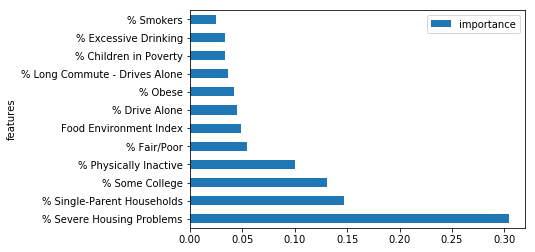

In [223]:
feature_importance.set_index('features').plot.barh()

In [224]:
RF.oob_score_

0.66884085377209601

#### Boosted Model

In [225]:
booster = GradientBoostingRegressor(n_estimators=100, learning_rate=.01, max_depth=6, subsample=.5)

In [226]:
booster = booster.fit(x_train, y_train)

In [227]:
feature_importance = zip(x_train.columns, booster.feature_importances_)

In [228]:
feature_importance = pd.DataFrame(feature_importance,  columns=['features','importance'])

In [229]:
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

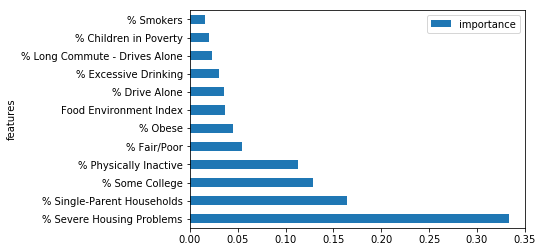

In [230]:
feature_importance.set_index('features').plot.barh()

#### Severe Housing Problems

In [234]:
for_trump = df_data['election_result'] == 1
for_clinton = df_data['election_result'] == 0

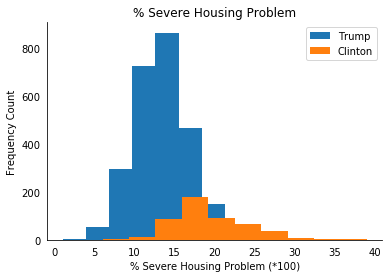

In [242]:
fig, ax = plt.subplots()

df_data[for_trump].hist(column='% Severe Housing Problems', ax=ax, label='Trump')
df_data[for_clinton].hist(column='% Severe Housing Problems', ax=ax, label='Clinton')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.grid(False)
ax.set_xlabel('% Severe Housing Problem (*100)')
ax.set_ylabel('Frequency Count')
ax.set_title('% Severe Housing Problem')
ax.legend()

In [245]:
df_data.groupby('election_result')['% Severe Housing Problems'].mean() #0 is Clinton, 1 is Trump

election_result
0    19.380658
1    13.430095
Name: % Severe Housing Problems, dtype: float64

#### Do the counties that support Trump have a different % Severe Housing Problem compared to counties that support Clinton?

#### This question is asking if the population average of the counties that support Trump compared to the population average of the counties that support Clinton

### Frequentist/Classical method of determining if two means are different 

In [278]:
clinton_mean = df_data.groupby('election_result')['% Severe Housing Problems'].mean()[0]
trump_mean = df_data.groupby('election_result')['% Severe Housing Problems'].mean()[1]
mean_sample = clinton_mean - trump_mean
mean_sample

5.9505631981187541

In [270]:
df_data.groupby('election_result').size()

election_result
0     486
1    2625
dtype: int64

In [271]:
clinton_count = df_data.groupby('election_result').size()[0]
trump_count = df_data.groupby('election_result').size()[1]

In [281]:
total_count = clinton_count + trump_count
num_resamples = 10000

means_resample = []
    
for _ in range(num_resamples):
    resample = np.random.choice(df_data['% Severe Housing Problems'], size=total_count, replace=False)
    resample_clinton, resample_trump = np.split(resample, [clinton_count])
    means_resample.append(np.mean(resample_clinton) - np.mean(resample_trump))

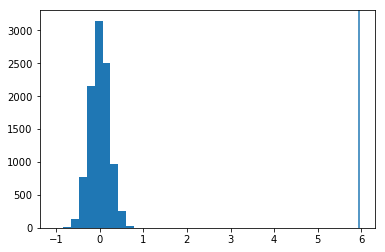

In [282]:
f, ax = plt.subplots(1,1) 
plt.hist(means_resample)
ax.axvline(mean_sample)

In [283]:
p_value = (np.sum(np.abs(means_resample) > np.abs(mean_sample))+1)/(np.size(means_resample)+1)
p_value

9.9990000999900015e-05

#### CONCLUSION: According to frequentist method, means are likely different

### Bayesian method of determing if two means are different

In [251]:
import pymc3 as pm

In [252]:
observed = df_data['% Severe Housing Problems']/100 #need to scale this value to be between 0 and 1, not 0 and 100

In [253]:
def mean_from_alpha_beta(alpha, beta):
    
    mean = alpha/(alpha + beta)
    
    return mean

In [254]:
def var_from_alpha_beta(alpha, beta):
    
    variance = (alpha * beta)/((alpha+beta)**2 * (alpha+beta+1))

In [255]:
with pm.Model() as model:
    
    #priors
    alpha = pm.Uniform('alpha', lower=0.001, upper=100.0, shape=2)
    beta = pm.Uniform('beta', lower=0.001, upper=100.0, shape=2)
    
    #likelihood
    y_obs = pm.Beta('y_obs', alpha=alpha[election_result], beta=beta[election_result], observed=observed)
    

Applied interval-transform to alpha and added transformed alpha_interval_ to model.
Applied interval-transform to beta and added transformed beta_interval_ to model.


In [261]:
with model:
    trace = pm.sample(10000)

Assigned NUTS to alpha_interval_
Assigned NUTS to beta_interval_
100%|██████████| 10000/10000 [05:20<00:00, 31.17it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1204ee210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120a2b250>]], dtype=object)

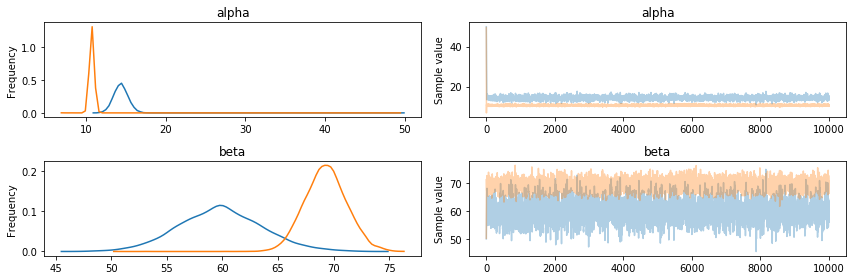

In [262]:
pm.traceplot(trace)

In [263]:
trace.varnames

['alpha_interval_', 'beta_interval_', 'alpha', 'beta']

In [264]:
trace['beta'][:5,:]

array([[ 50.00777538,  50.22099119],
       [ 50.53665201,  53.16590782],
       [ 52.04303512,  60.34522287],
       [ 57.08831883,  71.37175366],
       [ 57.08831883,  71.37175366]])

In [265]:
mean_clinton = mean_from_alpha_beta(trace['alpha'][2000:,0], trace['beta'][2000:,0])

In [266]:
mean_trump = mean_from_alpha_beta(trace['alpha'][2000:,1], trace['beta'][2000:,1])

In [267]:
diff_in_means = mean_clinton-mean_trump

(array([   22.,   133.,   600.,  1489.,  2268.,  2047.,  1032.,   344.,
           61.,     4.]),
 array([ 0.05172835,  0.05336901,  0.05500967,  0.05665033,  0.05829098,
         0.05993164,  0.0615723 ,  0.06321295,  0.06485361,  0.06649427,
         0.06813492]),
 <a list of 10 Patch objects>)

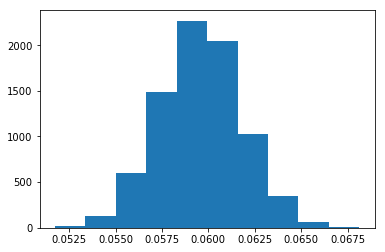

In [284]:
plt.hist(diff_in_means)

In [286]:
np.min(diff_in_means), np.max(diff_in_means)

(0.051728354723682285, 0.068134923445522189)

Since min of posterior distributin is greater than 0, there is zero probabiliy that the two means are equal

#### According to Bayesian method, means are likely different.

#### LOOK AT DIFFERENCE IN VARIANCE AS WELL!!!!